# Chronic Kidney Disease – Exploratory Data Analysis

This notebook performs exploratory data analysis on a healthcare dataset to understand variable distributions, relationships with disease presence, and statistical characteristics.

Methodology: CRISP-DM

## Libraries & Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels import robust
import scipy.stats as sp

## Data Loading

In [ ]:
data_disease=pd.read_csv("../data/ckd_dataset.csv")
data_disease.head()
data_disease.info()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
nulls = data_disease.isna().mean().sort_values(ascending=False) * 100
nulls[nulls > 0]

,0


In [ ]:
data_disease.duplicated().sum()

np.int64(0)

In [ ]:
for col in ["Al","Su","Rbc","Htn","Class"]:
    print(col, data_disease[col].value_counts(dropna=False))

Al Al
0.0    199
1.0     90
3.0     43
2.0     43
4.0     24
5.0      1
Name: count, dtype: int64
Su Su
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
Rbc Rbc
1.0    353
0.0     47
Name: count, dtype: int64
Htn Htn
0.00    251
1.00    147
0.37      2
Name: count, dtype: int64
Class Class
1    250
0    150
Name: count, dtype: int64


In [ ]:
data_disease = data_disease[data_disease["Htn"].isin([0,1])]

In [ ]:
data_disease["Htn"].value_counts()


,count
Htn,
0.0,251
1.0,147


## Target Variable & Class Distribution

Analysis of disease presence compared with clinical variables to understand class balance and category relationships.

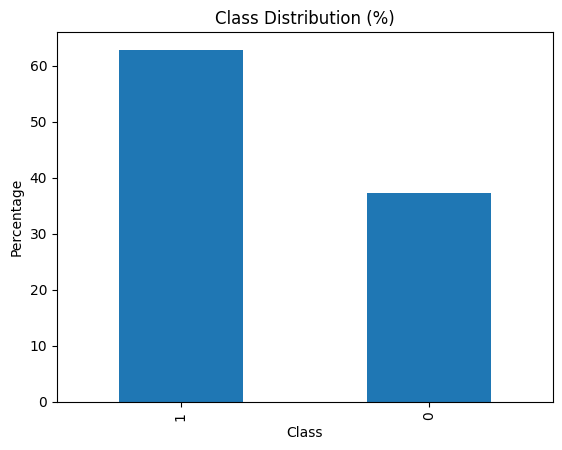

In [ ]:
data_categorico=data_disease.loc[:,['Al', 'Su', 'Rbc', 'Htn', 'Class']]
class_pct = data_categorico['Class'].value_counts(normalize=True) * 100
class_pct.plot(kind='bar')
plt.title("Class Distribution (%)")
plt.ylabel("Percentage")
plt.show()


It can be seen that the majority of the population analyzed in this dataset suffers from chronic kidney disease, due to various factors that will be analyzed below:

*1. Albumin vs Class Distribution*



Class      0       1
Al                  
0.0    72.59   27.41
1.0     5.56   94.44
2.0     0.00  100.00
3.0     0.00  100.00
4.0     0.00  100.00
5.0     0.00  100.00


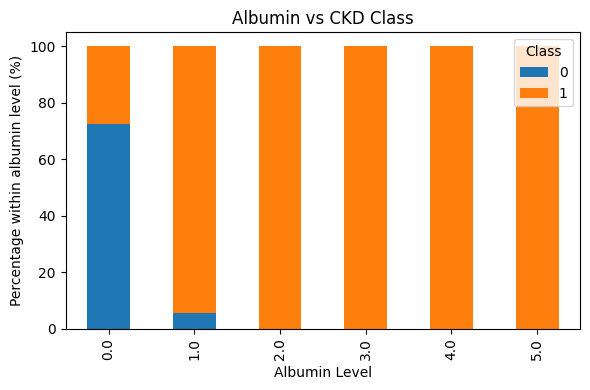

In [ ]:
tabla_al = (
    pd.crosstab(
        data_categorico['Al'],
        data_categorico['Class'],
        normalize='index'
    ) * 100
).round(2)
print(tabla_al)

ax = tabla_al.plot(kind="bar", stacked=True, figsize=(6,4))
ax.set_ylabel("Percentage within albumin level (%)")
ax.set_xlabel("Albumin Level")
ax.set_title("Albumin vs CKD Class")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

It can be concluded that the population that does not suffer from the disease has albumin levels of 0 and 1, however the population that does suffer from the disease is affected with respect to all albumin levels without the high level of albumin having a great influence, so it cannot be said that a higher albumin has a greater risk of suffering from CKD.

*2. Sugar vs Class Distribution*

Class      0       1
Su                  
0.0    43.92   56.08
1.0     0.00  100.00
2.0     0.00  100.00
3.0     0.00  100.00
4.0     0.00  100.00
5.0     0.00  100.00


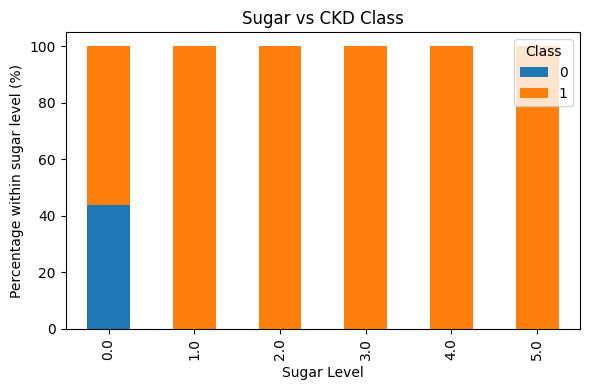

In [ ]:
tabla_Su = (
    pd.crosstab(
        data_categorico['Su'],
        data_categorico['Class'],
        normalize='index'
    ) * 100
).round(2)
print(tabla_Su)

ax = tabla_Su.plot(kind="bar", stacked=True, figsize=(6,4))
ax.set_ylabel("Percentage within sugar level (%)")
ax.set_xlabel("Sugar Level")
ax.set_title("Sugar vs CKD Class")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

For patients without chronic kidney disease (CKD), blood sugar levels are normal (0%). On the other hand, patients with CKD are divided into two groups: those with high blood sugar levels but whose impact on the population is minimal (15.25%), and those with normal blood sugar levels who represent the majority of the population. Therefore, it can be concluded that even without blood sugar problems, there is a high risk of developing the disease (47.25%).

*3. Normal or altered Red blood cells vs Class Districution*

Class      0       1
Rbc                 
0.0     0.00  100.00
1.0    42.17   57.83


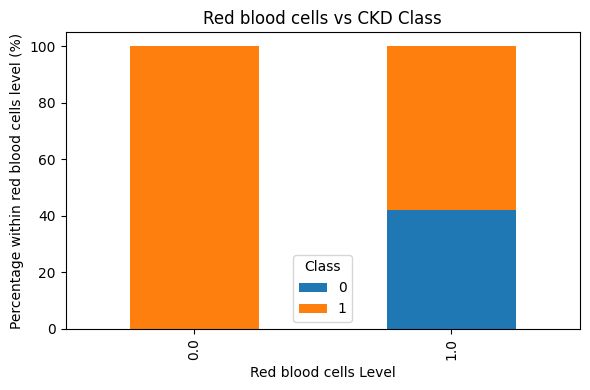

In [ ]:
tabla_Rbc = (
    pd.crosstab(
        data_categorico['Rbc'],
        data_categorico['Class'],
        normalize='index'
    ) * 100
).round(2)
print(tabla_Rbc)

ax = tabla_Rbc.plot(kind="bar", stacked=True, figsize=(6,4))
ax.set_ylabel("Percentage within red blood cells level (%)")
ax.set_xlabel("Red blood cells Level")
ax.set_title("Red blood cells vs CKD Class")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

It can be concluded that most patients suffer from CKD due to alterations in their red blood cell levels, as this can be a possible cause of anemia, and anemia is a factor in the progression of CKD. However, there is also a considerable percentage of the population that has altered red blood cell levels but does not suffer from CKD. This may be because their anemia is not severe or has not yet progressed to that stage.

4. Hypertension vs Class Distribution

Class      0       1
Htn                 
0.0    58.96   41.04
1.0     0.00  100.00


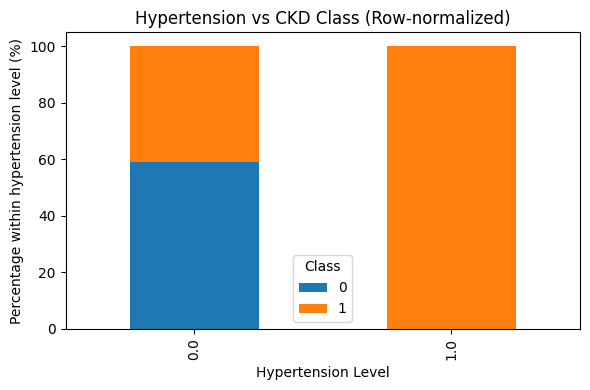

In [ ]:
tabla_Htn = (
    pd.crosstab(
        data_categorico['Htn'],
        data_categorico['Class'],
        normalize='index'
    ) * 100
).round(2)
print(tabla_Htn)

ax = tabla_Htn.plot(kind="bar", stacked=True, figsize=(6,4))
ax.set_ylabel("Percentage within hypertension level (%)")
ax.set_xlabel("Hypertension Level")
ax.set_title("Hypertension vs CKD Class (Row-normalized)")
plt.legend(title="Class")
plt.tight_layout()
plt.show()


Thanks to this proportion, it can be observed that the population does not suffer from CKD if they are not hypertensive. However, there are patients who suffer from the disease and may or may not be hypertensive; nevertheless, the trend is for them to be hypertensive, as they represent a higher percentage.

Note: The percentage does not reach 100% because there is an error in this column of the dataset, resulting in a value of 0.37. The only possible values ​​are 0 (not hypertensive) and 1 (hypertensive).

## Feature Relationship Analysis


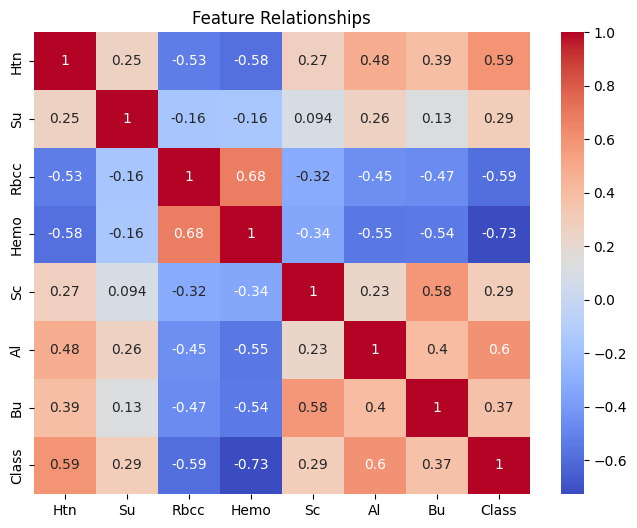

In [ ]:
# Reduced Dataset for Relationship Analysis

cols = ['Htn', 'Su', 'Rbcc', 'Hemo', 'Sc', 'Al', 'Bu', 'Class']
data_reducido = data_disease[cols].copy()
data_reducido.head()
plt.figure(figsize=(8,6))
sns.heatmap(data_reducido.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm')
plt.title("Feature Relationships")
plt.show()

## Statistical Summary

Descriptive statistical analysis including central tendency, dispersion, and distribution shape metrics.


In [ ]:
data_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
Bp,398.0,76.512563,13.481159,50.000,70.000,80.00,80.000,180.000
Sg,398.0,1.017676,0.005423,1.005,1.015,1.02,1.020,1.025
Al,398.0,1.020101,1.273484,0.000,0.000,1.00,2.000,5.000
Su,398.0,0.396985,1.042276,0.000,0.000,0.00,0.000,5.000
Rbc,398.0,0.881910,0.323121,0.000,1.000,1.00,1.000,1.000
Bu,398.0,57.513065,49.381378,1.500,27.250,44.00,63.250,391.000
Sc,398.0,3.082261,5.629869,0.400,0.900,1.40,3.070,76.000
Sod,398.0,137.514095,9.216744,4.500,135.000,137.53,141.000,163.000
Pot,398.0,4.626482,2.826810,2.500,4.000,4.63,4.800,47.000
Hemo,398.0,12.510201,2.712716,3.100,10.825,12.53,14.575,17.800


In [ ]:
summary_stats = pd.DataFrame({
    "mean": data_disease.mean(numeric_only=True),
    "median": data_disease.median(numeric_only=True),
    "std": data_disease.std(numeric_only=True),
    "min": data_disease.min(numeric_only=True),
    "max": data_disease.max(numeric_only=True)
})

summary_stats["mode"] = data_disease.mode(numeric_only=True).iloc[0]
summary_stats


,mean,median,std,min,max,mode
Bp,76.512563,80.00,13.481159,50.000,180.000,80.00
Sg,1.017676,1.02,0.005423,1.005,1.025,1.02
Al,1.020101,1.00,1.273484,0.000,5.000,0.00
Su,0.396985,0.00,1.042276,0.000,5.000,0.00
Rbc,0.881910,1.00,0.323121,0.000,1.000,1.00
Bu,57.513065,44.00,49.381378,1.500,391.000,57.00
Sc,3.082261,1.40,5.629869,0.400,76.000,1.20
Sod,137.514095,137.53,9.216744,4.500,163.000,137.53
Pot,4.626482,4.63,2.826810,2.500,47.000,4.63
Hemo,12.510201,12.53,2.712716,3.100,17.800,12.53


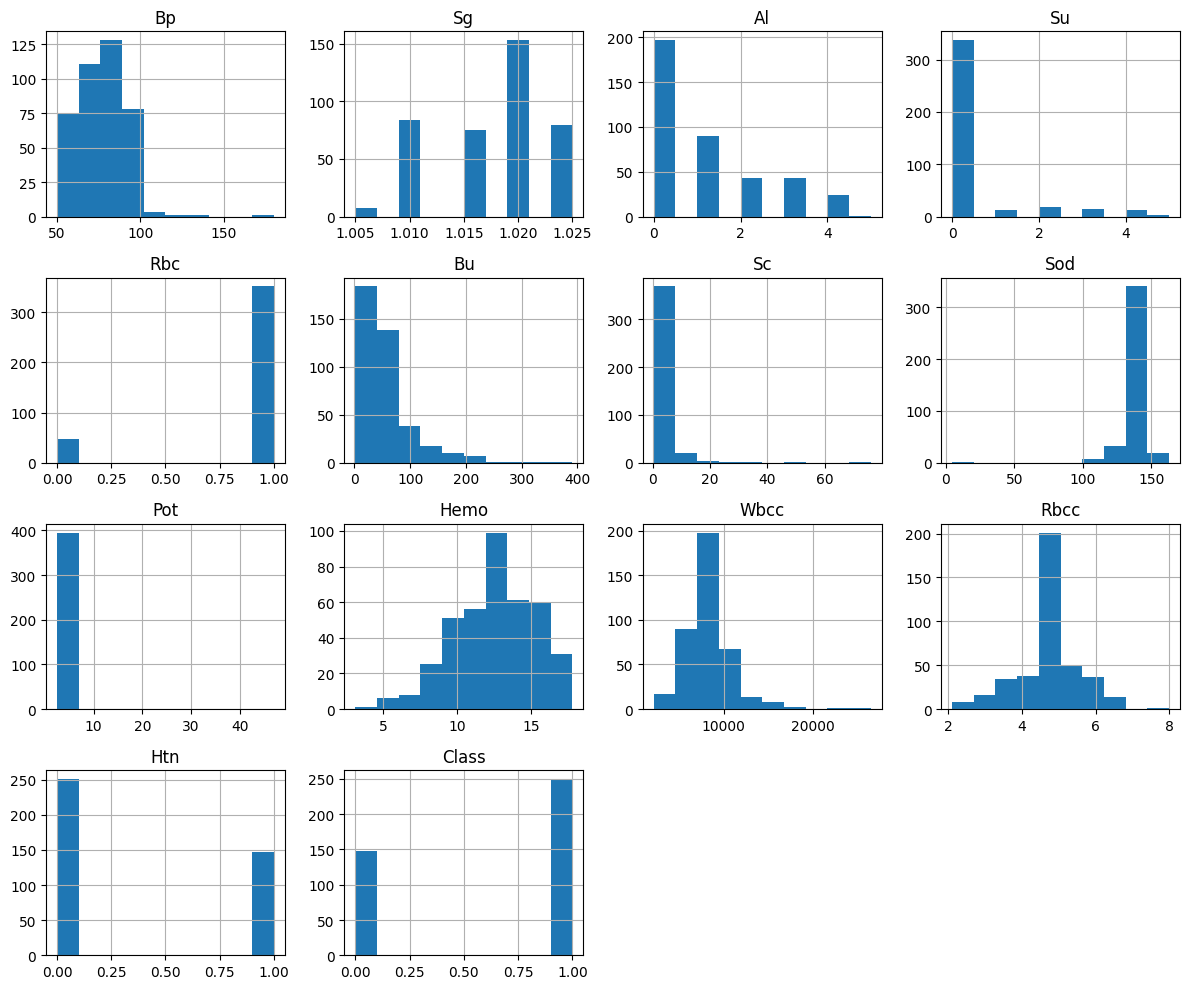

In [ ]:
num_cols = data_disease.select_dtypes(include='number').columns

data_disease[num_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()

##Key Insights (EDA)

- Hemo (hemoglobin): shows a clear inverse relationship with class; lower values ​​are concentrated in CKD, demonstrating good separation between classes.
- Sc (serum creatinine): shows a strong positive relationship with CKD; high values ​​appear mainly in the CKD class, making it a variable with a high predictive signal.
- Rbcc/Rbc: indicators related to red blood cells show a stable pattern: altered levels are associated with a higher prevalence of CKD, suggesting good utility for classification.
- Htn (hypertension): categorical variable with a directional pattern; the proportion of CKD increases in hypertensive patients, demonstrating good discriminatory power.
- Al (albumin) and Su (sugar): although clinically relevant, they show greater overlap between classes in this dataset; they can provide value when combined with other variables, but are not the strongest on their own.